In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [2]:
start = date(2014, 1, 1)
end = date.today()

In [3]:
portfolio = ["AAPL","MSFT","GE","BAC", "VZ"]
data = pd.DataFrame()
for co in portfolio:
    data[co] = web.DataReader(co, 'google', start, end)["Close"]

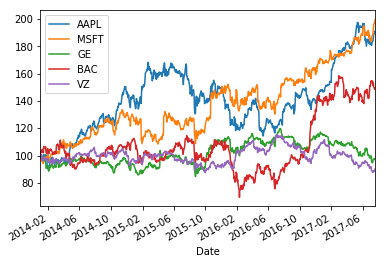

In [4]:
(data/data.ix[0] * 100).plot()
plt.show()

In [5]:
#Calculating returns
returns = np.log(data/data.shift(1))
returns.tail()

,AAPL,MSFT,GE,BAC,VZ
Date,,,,,
2017-07-14,0.008558,0.013975,-0.000373,-0.016793,0.001608
2017-07-17,0.003483,0.007801,0.001493,-0.007879,0.002293
2017-07-18,0.003471,-0.000682,0.002607,-0.005008,-0.006895
2017-07-19,0.006244,0.007611,0.001858,0.006672,0.002073
2017-07-20,-0.004513,0.004862,-0.009323,-0.005000,0.017566


In [6]:
#Mean-variance of returns
#Since we have significant differences in performance, 
#we have to use 252 trading days to annualize the daily returns 
returns.mean() * 252


AAPL    0.181507
MSFT    0.195223
GE     -0.008437
BAC     0.111956
VZ     -0.028965
dtype: float64

In [7]:
#Building covariance matrix
returns.cov() * 252

,AAPL,MSFT,GE,BAC,VZ
AAPL,0.053009,0.022494,0.013851,0.019356,0.009156
MSFT,0.022494,0.049519,0.016628,0.022471,0.013034
GE,0.013851,0.016628,0.031627,0.022964,0.011044
BAC,0.019356,0.022471,0.022964,0.068875,0.009268
VZ,0.009156,0.013034,0.011044,0.009268,0.024270


In [8]:
#We assume that we do not open short position and we divide our money equally divided among 5 stocks
#So we generate 5 random numbers and then normalize them so that values would sum up 100% net oper assets
noa = len(portfolio)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.04888213,  0.20003294,  0.24614757,  0.15592067,  0.3490167 ])

In [9]:
#Calculating Expected portfolio return based on the weights
expected_return = np.sum(returns.mean() * weights) * 252
expected_return

0.05319350965410729

In [10]:
#Now lets calculate Expected portfolio variance using our covariance matrix
#we use np.dot -  gets us a product of two matrices
expected_variance = np.dot(weights.T, np.dot(returns.cov() * 252, weights))
expected_variance


0.019563929029297905

In [11]:
#Now we calculate expected standard deviation or volatility 
volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))) 
volatility


0.13987111577912684

In [12]:
#Monte Carlo simulation to generate random portfolio weight vectors on larger scale
#For every simulated allocation we record the resulting portfolio return and variance
#We assume Risk free is 0
mrets = []
mvols = []
for i in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    mrets.append(np.sum(returns.mean() * weights) * 252)
    mvols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights ))))

mrets = np.array(mrets)
mvols = np.array(mvols)

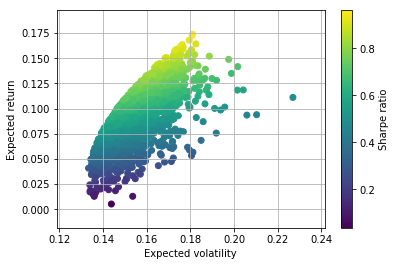

In [13]:
#Lets plot it
plt.figure()
plt.scatter(mvols, mrets, c=mrets / mvols, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label="Sharpe ratio")
plt.show()